In [41]:
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pingouin as pg
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')

In [42]:
overall_data = pd.read_excel('~/github/gal/Analyzing-Medicare-Expansion/data2/All States All Data Collected.xlsx')
overall_data.head()

,State,code,Medicare Expansion Adoption,Expanded ?,% overweight or obese,"% Adults, Smoke","Heart Disease Death Rate per 100,000","Cancer Death Rate per 100,000","Stroke Death Rate per 100,000","Mortality Rate per 100,000",...,"% Adults, Health Good","% Adults, Health Very Good","% Adults, Health Excellent",Excellent Mental Health (0 Poor days),Good Mental Health (1-4 Poor Days),Fair Mental Health (5-13 Days Poor),Bad Mental Health (14+ Days Poor),"% Adults, No care due to cost","% Adults, Trouble Paying Medical Bills",% Adults Uninsured
0,Alabama,AL,Not Adopted,Not Expanded,0.697,19.2,224.7,170.4,51.5,918.1,...,0.340,0.286,0.145,0.6168,0.1245,0.1030,0.1557,0.13649,0.264,0.120369
1,Alaska,AK,Adopted,Expanded,0.642,19.1,129.7,141.5,40.0,700.3,...,0.316,0.313,0.214,0.6462,0.1380,0.1063,0.1095,0.13306,0.261,0.106147
2,Arizona,AZ,Adopted,Expanded,0.647,14.0,136.4,131.9,31.0,669.2,...,0.315,0.304,0.187,0.6574,0.1227,0.0946,0.1253,0.14871,0.325,0.082839
3,Arkansas,AR,Adopted,Expanded,0.705,22.7,217.4,168.8,41.5,876.6,...,0.323,0.293,0.137,0.6058,0.1260,0.1082,0.1600,0.11855,0.178,0.071597
4,California,CA,Adopted,Expanded,0.622,11.2,139.7,135.0,37.0,609.0,...,0.330,0.304,0.185,0.6317,0.1460,0.1083,0.1139,0.12155,0.279,0.076538


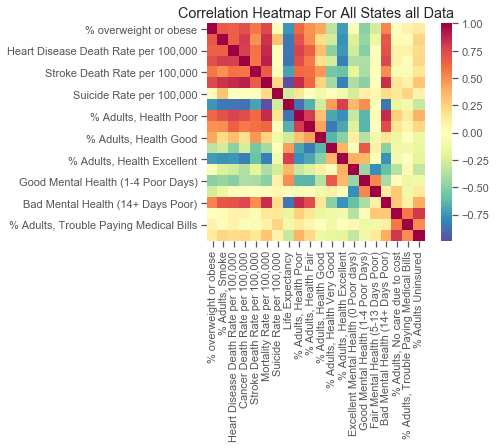

In [43]:
corrs = overall_data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', square=True)
plt.title('Correlation Heatmap Matrix')

plt.title('Correlation Heatmap For All States all Data')
plt.savefig('Heatmap_all_states_all_data.png')

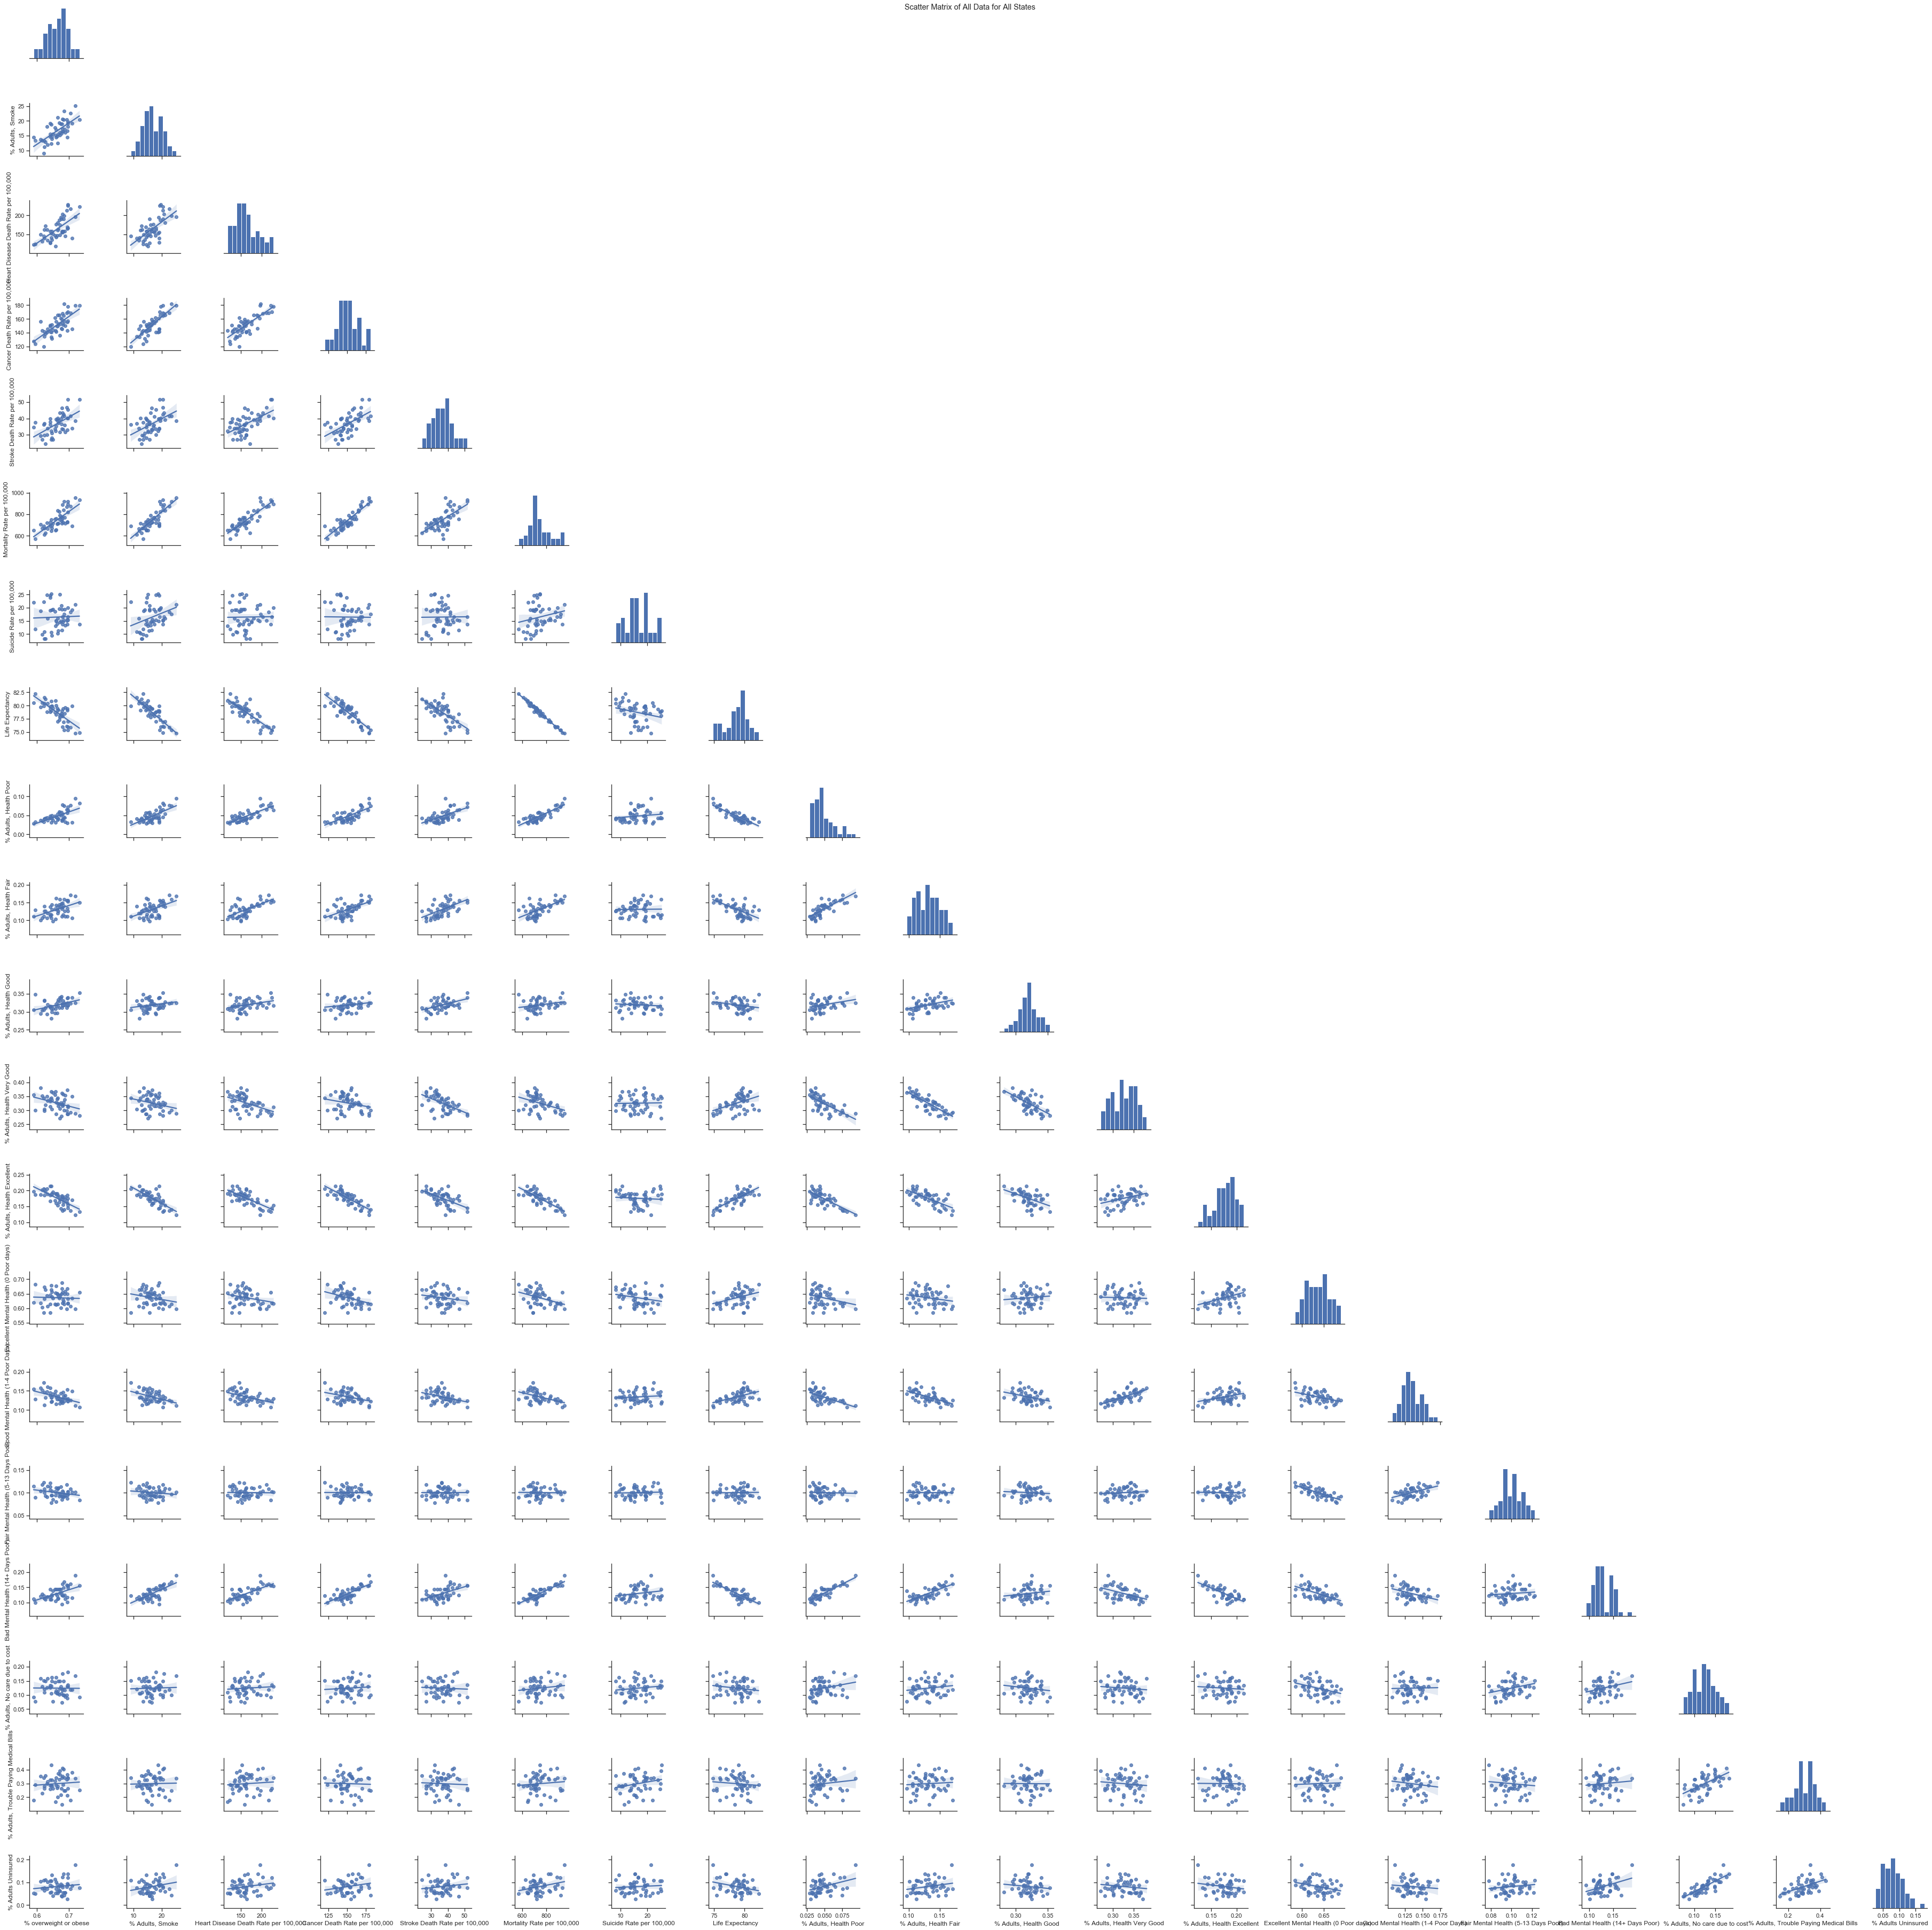

In [44]:

sns.set(style="ticks")

g = sns.pairplot(overall_data, kind = 'reg', corner=True)
g.fig.suptitle("Scatter Matrix of All Data for All States", y=1)
plt.savefig('Scatter_Matrix_all_states_all_data.png')

Text(0.5, 0.92, 'All States Histograms')

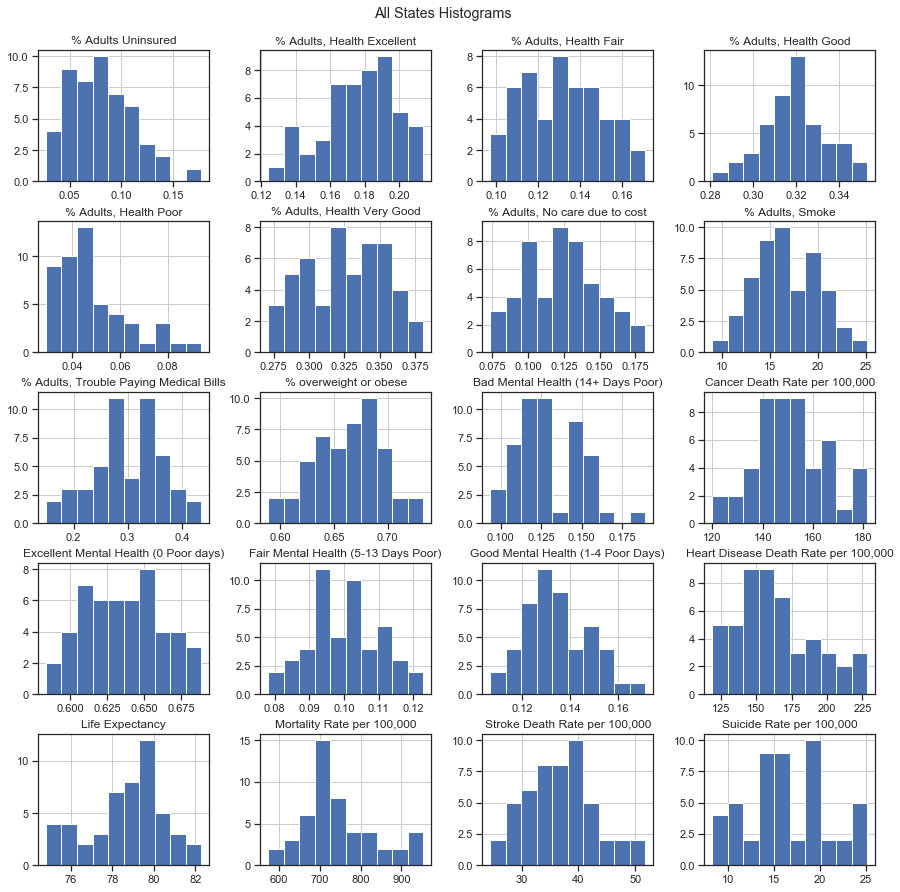

In [45]:
overall_data.hist(figsize = (15,15))

plt.savefig("All_States_All_Data_Histograms.png")
pl.suptitle("All States Histograms" , y = .92)

In [ ]:
adopted = overall_data[overall_data[overall_data.expanded_? == 'Adopted']]

In [47]:

overall_data.describe()

,% overweight or obese,"% Adults, Smoke","Heart Disease Death Rate per 100,000","Cancer Death Rate per 100,000","Stroke Death Rate per 100,000","Mortality Rate per 100,000","Suicide Rate per 100,000",Life Expectancy,"% Adults, Health Poor","% Adults, Health Fair","% Adults, Health Good","% Adults, Health Very Good","% Adults, Health Excellent",Excellent Mental Health (0 Poor days),Good Mental Health (1-4 Poor Days),Fair Mental Health (5-13 Days Poor),Bad Mental Health (14+ Days Poor),"% Adults, No care due to cost","% Adults, Trouble Paying Medical Bills",% Adults Uninsured
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.663220,16.64800,164.296000,151.514000,36.808000,747.468000,16.450000,78.699200,0.048180,0.131160,0.319280,0.325680,0.175660,0.635984,0.134302,0.100204,0.129520,0.124328,0.299040,0.081703
std,0.031512,3.31584,27.927566,14.349216,6.108069,89.540226,4.511674,1.796046,0.014948,0.019202,0.014912,0.027639,0.021536,0.026092,0.013965,0.010608,0.019879,0.026162,0.065401,0.030327
min,0.589000,9.00000,119.000000,120.000000,24.400000,572.500000,8.300000,74.790000,0.029000,0.097000,0.281000,0.271000,0.124000,0.583600,0.106600,0.078100,0.093500,0.073460,0.149000,0.027210
25%,0.642500,14.50000,145.875000,141.975000,32.400000,690.675000,13.700000,77.837500,0.037250,0.113750,0.311250,0.304000,0.163250,0.614850,0.124800,0.092900,0.114325,0.105210,0.263250,0.056302
50%,0.665500,16.25000,158.900000,150.550000,36.800000,723.600000,15.700000,79.070000,0.044000,0.130500,0.319000,0.325500,0.180000,0.637050,0.132450,0.100150,0.123850,0.121645,0.295500,0.078932
75%,0.684750,19.07500,179.550000,160.675000,40.250000,788.225000,19.300000,79.880000,0.055500,0.143750,0.329500,0.348500,0.188750,0.654025,0.144350,0.108125,0.143450,0.147410,0.341750,0.101761
max,0.733000,25.20000,228.500000,181.600000,51.800000,953.800000,25.200000,82.290000,0.094000,0.171000,0.353000,0.381000,0.214000,0.688400,0.171200,0.122900,0.189400,0.181990,0.436000,0.176901


Text(0.5, 1.0, '% overweight or obese')

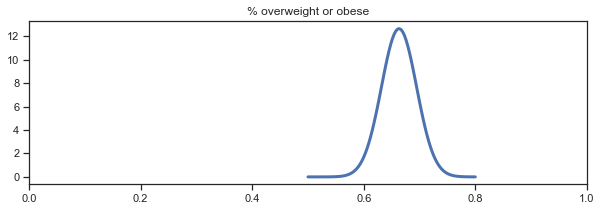

In [48]:
fig, ax = plt.subplots(1, figsize=(10, 3))

difference_in_proportions = stats.norm(0.663220, 0.031512)
#overall_data.loc["% overweight or obese"].hist()
x = np.linspace(.5, .8, num=100)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(0, 1)
ax.set_title("% overweight or obese")

In [49]:
adopted = overall_data.groupby('Medicare Expansion Adoption')
adopted.describe()

% overweight or obese                             \
                                            count      mean       std    min   
Medicare Expansion Adoption                                                    
Adopted                                      37.0  0.655973  0.031552  0.589   
Not Adopted                                  13.0  0.683846  0.021102  0.644   

                                                        % Adults, Smoke  \
                               25%    50%    75%    max           count   
Medicare Expansion Adoption                                               
Adopted                      0.633  0.658  0.676  0.720            37.0   
Not Adopted                  0.678  0.681  0.695  0.733            13.0   

                                        ...  \
                                  mean  ...   
Medicare Expansion Adoption             ...   
Adopted                      16.329730  ...   
Not Adopted                  17.553846  ...   

                            % Adults, Trouble Paying Medical Bills         \
                                                               75%    max   
Medicare Expansion Adoption                                                 
Adopted                                                      0.337  0.405   
Not Adopted                                                  0.365  0.436   

                            % Adults Uninsured                                \
                                         count      mean       std       min   
Medicare Expansion Adoption                                                    
Adopted                                   37.0  0.079512  0.031421  0.027210   
Not Adopted                               13.0  0.087937  0.027146  0.053887   

                                                                     
                                  25%       50%       75%       max  
Medicare Expansion Adoption                                          
Adopted                      0.055742  0.076538  0.101714  0.176901  
Not Adopted                  0.070565  0.084664  0.105625  0.137747  

[2 rows x 160 columns]

KeyError: 'Medicare Expansion Adoption'

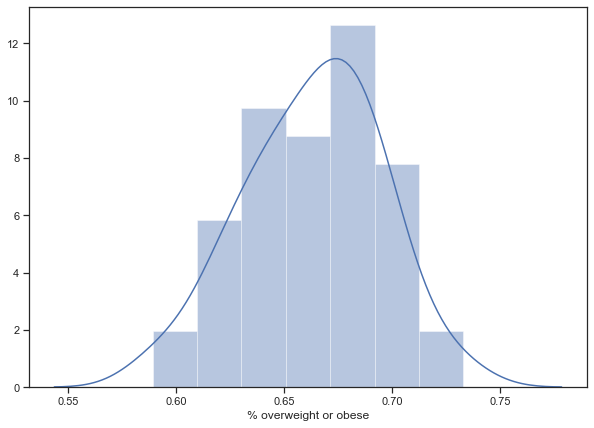

In [50]:


plt.figure(figsize=(10,7))
sns.distplot(overall_data.loc[:,"% overweight or obese"])
sns.distplot(overall_data.loc[:,"% overweight or obese"].groupby('Medicare Expansion Adoption'), color="orange", label="SUV", **kwargs)
sns.distplot(x3, color="deeppink", label="minivan", **kwargs)
plt.xlim(50,75)
plt.legend();